[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nishani53/Khanal_MSc_Thesis_MSU/blob/main/Khanal_MSU_project_Mills_1980-2020s/Khanal_MSU_project_Mills_1980_2020s.ipynb)


# Maps for Primary Milling Services in Michigan


**Prepared by Naresh Khanal**  
Forest Economics Lab, Michigan State University  
February 01, 2025  
Khanalna@msu.edu


There are four different years taken in this study, <span style="color:blue">1985</span>, <span style="color:green">1994</span>, <span style="color:red">2002</span>, and <span style="color:black">2018</span>, each representing a different decade.

Each has different types:
- <span style="color:blue">Hardwood only</span>
- <span style="color:green">Softwood only</span>
- <span style="color:red">Both hardwood and softwood</span>
- <span style="color:black">Biomass mills</span>
- <span style="color:blue">Pulp mills</span>
- <span style="color:green">Undefined mills</span>

Further, each mill is categorized with different category classes:
- <span style="color:blue">0-100 MBF</span>
- <span style="color:green">101-500</span>
- <span style="color:red">501-1000</span>
- <span style="color:black">1001-3000</span>
- <span style="color:blue">3001-5000</span>
- <span style="color:green">5001-7500</span>
- <span style="color:red">7500 above</span>
- <span style="color:black">Undefined</span>

**Download the necessary Libraries**

In [7]:
# Clone your GitHub repo into Colab (only needs to be done once per session)
!git clone https://github.com/Nishani53/Khanal_MSc_Thesis_MSU.git
%cd Khanal_MSc_Thesis_MSU


Cloning into 'Khanal_MSc_Thesis_MSU'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 205 (delta 86), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (205/205), 31.07 MiB | 14.23 MiB/s, done.
Resolving deltas: 100% (86/86), done.
/content/Khanal_MSc_Thesis_MSU/Khanal_MSc_Thesis_MSU


In [8]:
# --- Install required packages (if not already installed) ---

!pip install geopandas fiona
!pip install matplotlib-scalebar
!pip install gdown
!pip install pydrive
!pip install matplotlib-scalebar
!pip install geopandas matplotlib pandas numpy


In [9]:
# --- Download and unzip main repo ---
!curl -L -o mills_data.zip https://github.com/Nishani53/Khanal_MSc_Thesis_MSU/archive/refs/heads/main.zip
!unzip -o mills_data.zip

# --- Unzip the Michigan Mills dataset inside the repo ---
!unzip -o "Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s/Data/Michigan_Mills.zip" -d "Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s/Data"

# --- Set correct base path ---
base_path = "Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s/Data/Michigan_Mills"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22.7M    0 22.7M    0     0  8913k      0 --:--:--  0:00:02 --:--:-- 18.7M
Archive:  mills_data.zip
ca09d452e49a31819db7cd42ae4821c84477be3b
   creating: Khanal_MSc_Thesis_MSU-main/
   creating: Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s/
 extracting: Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s/.gitkeep  
   creating: Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s/Data/
 extracting: Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s/Data/.gitkeep  
  inflating: Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Competition_Hotspots_1980s-2020s/Data/Competition Hotspots Data.zip  
  inflating: Khanal_MSc_Thesis_MSU-main/Khanal

**1985 Map**

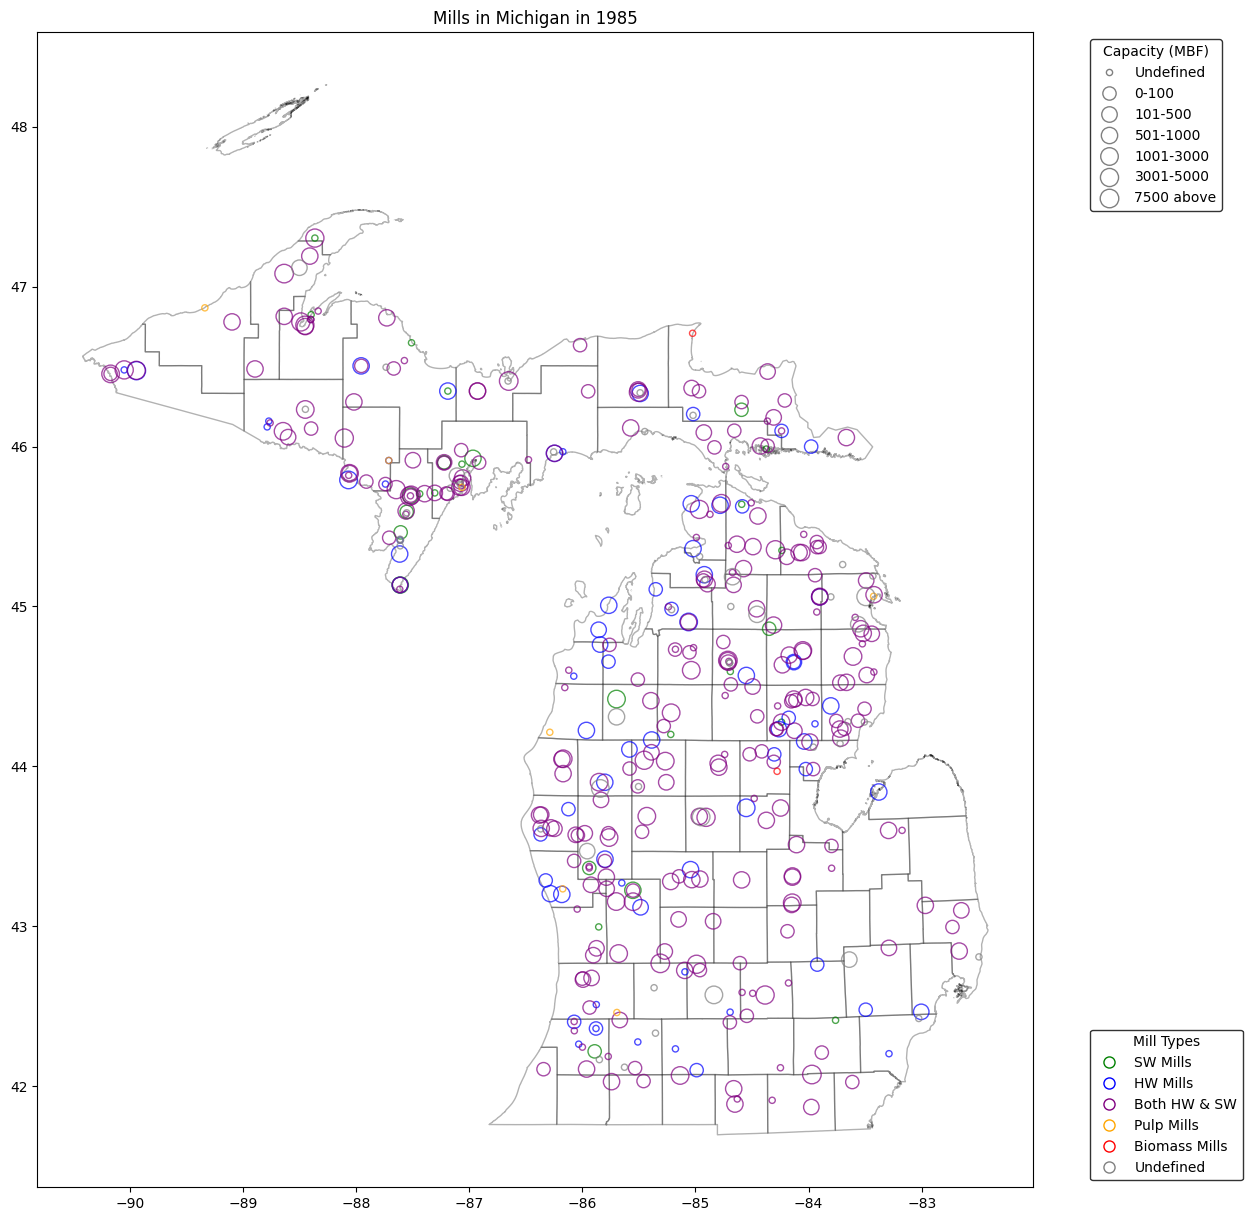

In [10]:

# --- Set path to Michigan_mills folder inside the repo ---
base_path = "Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s/Data/Final_Mills_MAPS"

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# --- File paths ---
softwood_shp   = os.path.join(base_path, "Softwood_1985.shp")
hardwood_shp   = os.path.join(base_path, "Hardwood_1985.shp")
both_hwsw_shp  = os.path.join(base_path, "Both_HWSW_1985.shp")
pulp_shp       = os.path.join(base_path, "Pulp_1985.shp")
biomass_shp    = os.path.join(base_path, "Biomass_1985.shp")
undefined_shp  = os.path.join(base_path, "Undefined_1985.shp")
michigan_path  = os.path.join(base_path, "Michigan Counties.shp")

# --- Load shapefiles ---
softwood_gdf   = gpd.read_file(softwood_shp)
hardwood_gdf   = gpd.read_file(hardwood_shp)
both_hwsw_gdf  = gpd.read_file(both_hwsw_shp)
pulp_gdf       = gpd.read_file(pulp_shp)
biomass_gdf    = gpd.read_file(biomass_shp)
undefined_gdf  = gpd.read_file(undefined_shp)
michigan_gdf   = gpd.read_file(michigan_path)

# --- Define legend categories ---
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

def get_capacity_category(capacity):
    if capacity is None or pd.isna(capacity): return 50
    if capacity <= 100: return 50
    elif capacity <= 500: return 100
    elif capacity <= 1000: return 500
    elif capacity <= 3000: return 1000
    elif capacity <= 5000: return 3000
    elif capacity <= 7500: return 5000
    else: return 7500

def scale_size(category, max_size=200):
    if category <= 50: return 20
    size = np.log(category) * 20
    return min(size, max_size)

def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Capacity_C' in gdf.columns:
        gdf['size_category'] = gdf['Capacity_C'].apply(get_capacity_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.3)

plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)
plot_mills(undefined_gdf, 'grey', ax)

# --- Padding the plot area ---
padding = 0.05
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# --- Create capacity legend ---
capacity_handles = []
for size_category in legend_labels:
    size_in_plot = scale_size(size_category)
    handle = plt.Line2D([0], [0],
                        marker='o', color='grey', markerfacecolor='none',
                        markersize=np.sqrt(size_in_plot),
                        label=legend_labels[size_category],
                        linestyle='None')
    capacity_handles.append(handle)

mill_type_colors = {
    'SW Mills': 'green', 'HW Mills': 'blue', 'Both HW & SW': 'purple',
    'Pulp Mills': 'orange', 'Biomass Mills': 'red', 'Undefined': 'grey'
}
mill_handles = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                           markersize=8, label=label, linestyle='None')
                for label, color in mill_type_colors.items()]

# --- Add legends ---
capacity_legend = ax.legend(handles=capacity_handles, title='Capacity (MBF)',
                            loc='upper left', bbox_to_anchor=(1.05, 1),
                            frameon=True, edgecolor='black')
ax.add_artist(capacity_legend)
ax.legend(handles=mill_handles, title='Mill Types',
          loc='lower left', bbox_to_anchor=(1.05, 0),
          frameon=True, edgecolor='black')

plt.title("Mills in Michigan in 1985")
plt.savefig('mills_in_michigan_1985.png', bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()


**1994 Map**

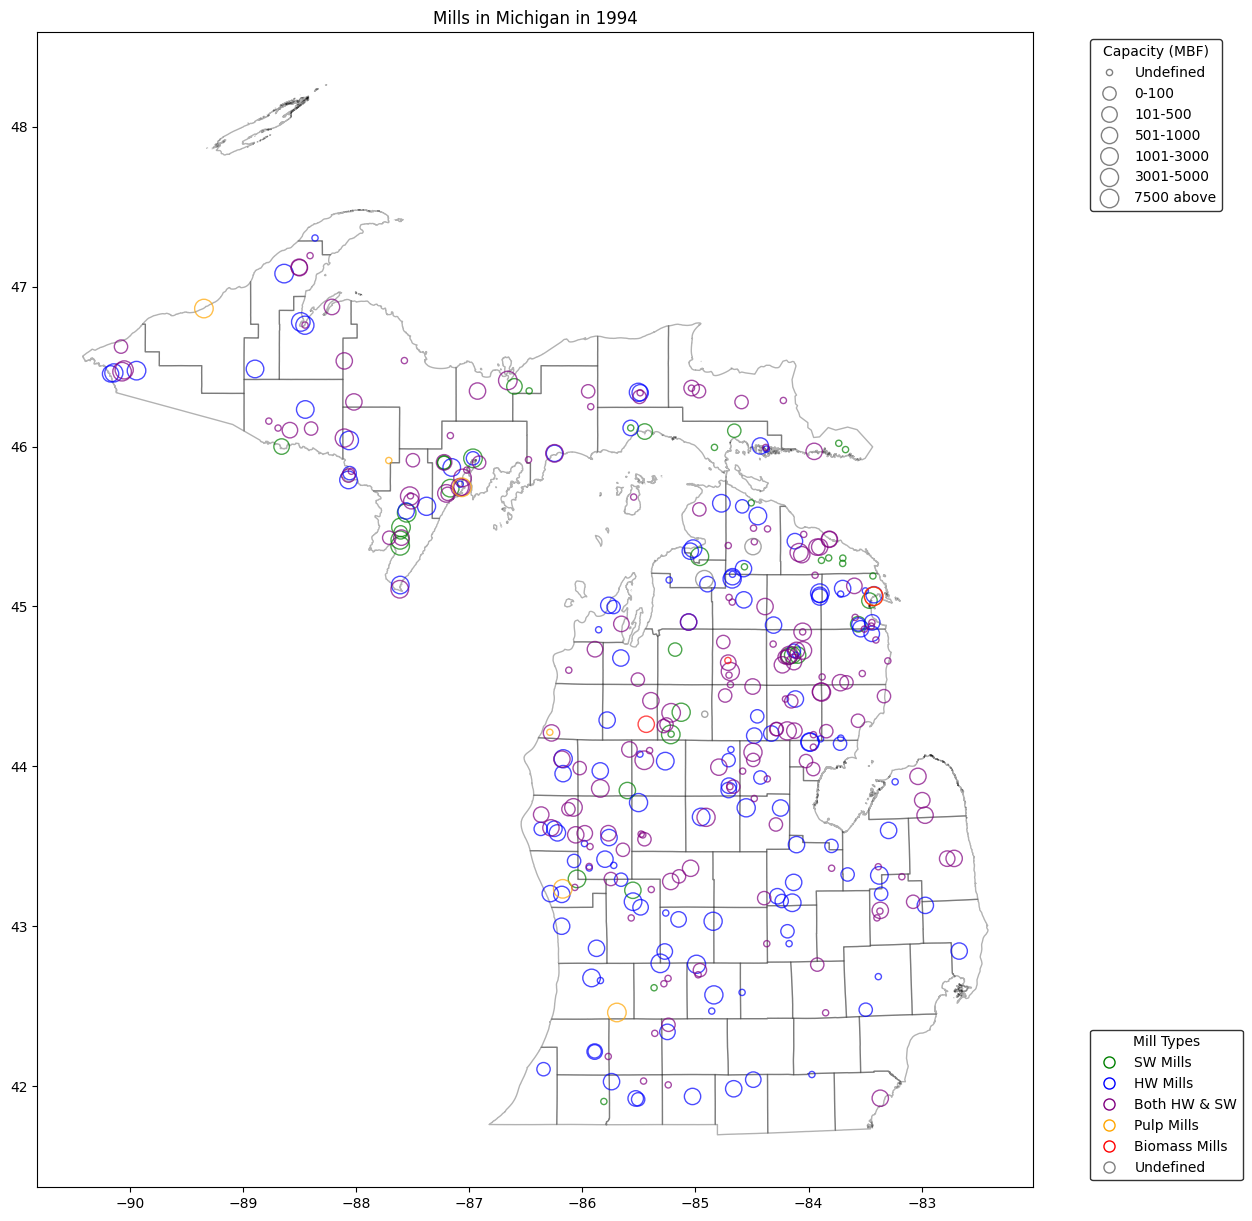

In [11]:

# --- Set path to Michigan_mills folder inside the repo ---
base_path = "Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s/Data/Final_Mills_MAPS"


import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# --- File paths for 1994 shapefiles ---
softwood_shp   = os.path.join(base_path, "Softwood_1994.shp")
hardwood_shp   = os.path.join(base_path, "Hardwood_1994.shp")
both_hwsw_shp  = os.path.join(base_path, "Both_HWSW_1994.shp")
pulp_shp       = os.path.join(base_path, "Pulp_1994.shp")
biomass_shp    = os.path.join(base_path, "Biomass_1994.shp")
undefined_shp  = os.path.join(base_path, "Undefined_1994.shp")
michigan_path  = os.path.join(base_path, "Michigan Counties.shp")

# --- Load shapefiles ---
softwood_gdf   = gpd.read_file(softwood_shp)
hardwood_gdf   = gpd.read_file(hardwood_shp)
both_hwsw_gdf  = gpd.read_file(both_hwsw_shp)
pulp_gdf       = gpd.read_file(pulp_shp)
biomass_gdf    = gpd.read_file(biomass_shp)
undefined_gdf  = gpd.read_file(undefined_shp)
michigan_gdf   = gpd.read_file(michigan_path)

# --- Capacity legend ---
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

def get_capacity_category(capacity):
    if capacity is None or pd.isna(capacity): return 50
    if capacity <= 100: return 50
    elif capacity <= 500: return 100
    elif capacity <= 1000: return 500
    elif capacity <= 3000: return 1000
    elif capacity <= 5000: return 3000
    elif capacity <= 7500: return 5000
    else: return 7500

def scale_size(category, max_size=200):
    if category <= 50:
        return 20
    return min(np.log(category) * 20, max_size)

def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Capacity_C' in gdf.columns:
        gdf['size_category'] = gdf['Capacity_C'].apply(get_capacity_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7)

# --- Plot base map and mills ---
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.3)

# --- Plot each mill type ---
plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)
plot_mills(undefined_gdf, 'grey', ax)

# --- Axis padding ---
padding = 0.05
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# --- Legends ---
capacity_handles = [
    plt.Line2D([0], [0], marker='o', color='grey', markerfacecolor='none',
               markersize=np.sqrt(scale_size(size)), label=label, linestyle='None')
    for size, label in legend_labels.items()
]

mill_type_colors = {
    'SW Mills': 'green',
    'HW Mills': 'blue',
    'Both HW & SW': 'purple',
    'Pulp Mills': 'orange',
    'Biomass Mills': 'red',
    'Undefined': 'grey'
}
mill_handles = [
    plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
               markersize=8, label=label, linestyle='None')
    for label, color in mill_type_colors.items()
]

# --- Add legends ---
capacity_legend = ax.legend(handles=capacity_handles, title='Capacity (MBF)',
                            loc='upper left', bbox_to_anchor=(1.05, 1),
                            frameon=True, edgecolor='black')
ax.add_artist(capacity_legend)
ax.legend(handles=mill_handles, title='Mill Types',
          loc='lower left', bbox_to_anchor=(1.05, 0),
          frameon=True, edgecolor='black')

plt.title("Mills in Michigan in 1994")
plt.savefig("mills_in_michigan_1994.png", bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()


**2002 Map**

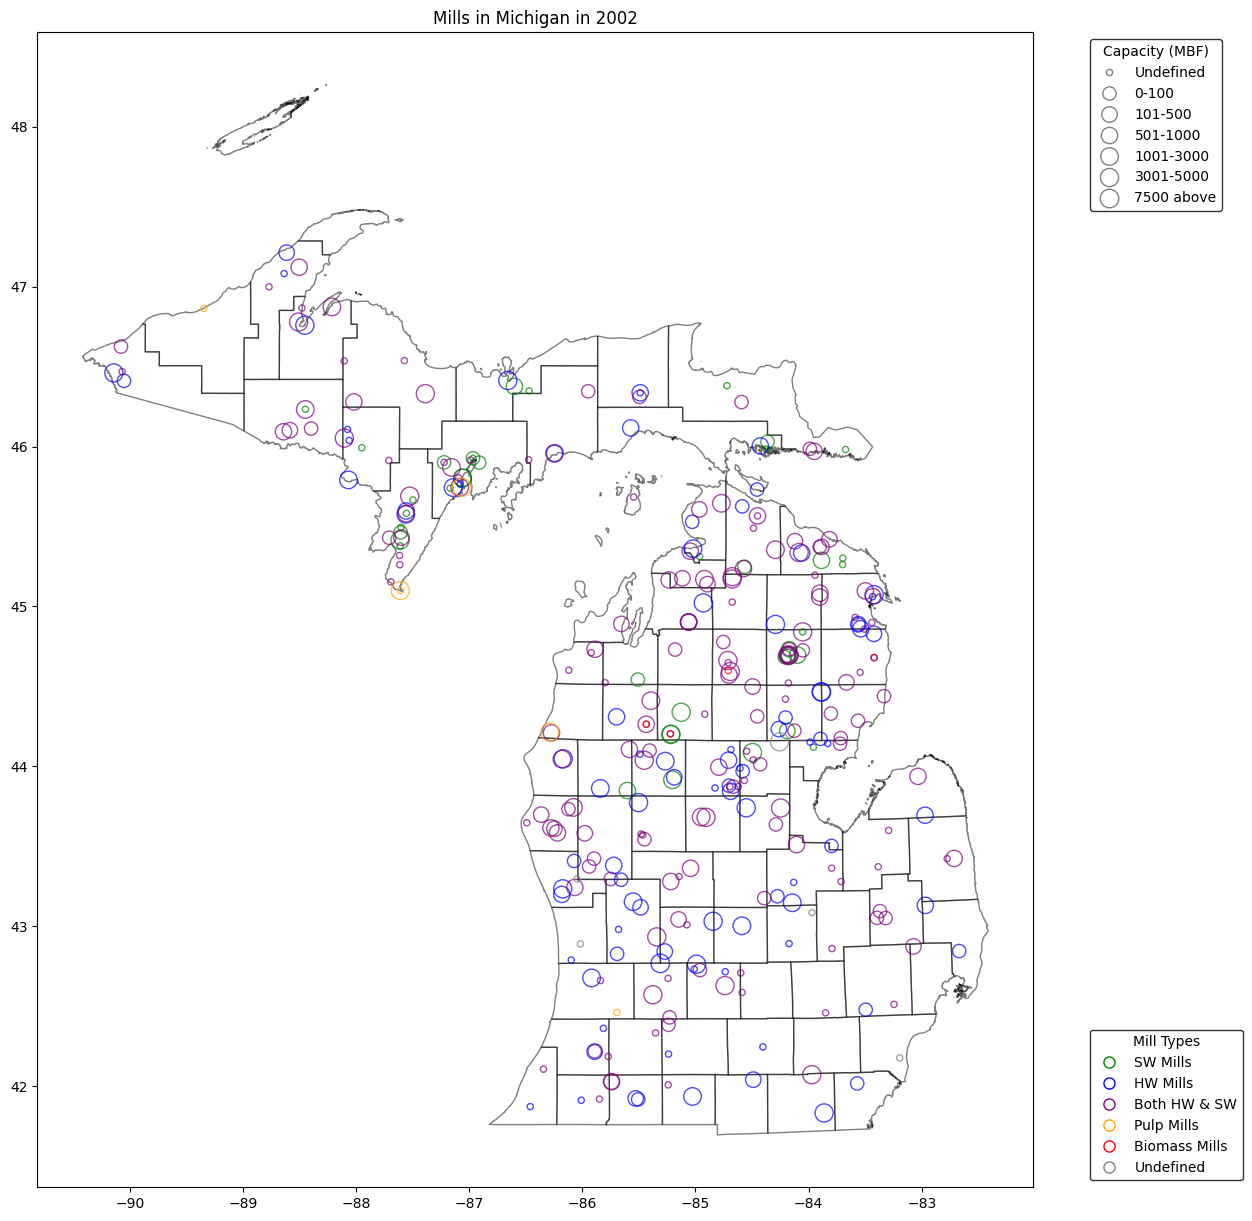

In [12]:

# --- Set path to Michigan_mills folder inside the repo ---
base_path = "Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s/Data/Final_Mills_MAPS"


import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# --- File paths for 2002 ---
softwood_shp   = os.path.join(base_path, "Softwood_2002.shp")
hardwood_shp   = os.path.join(base_path, "Hardwood_2002.shp")
both_hwsw_shp  = os.path.join(base_path, "Both_HWSW_2002.shp")
pulp_shp       = os.path.join(base_path, "Pulp_2002.shp")
biomass_shp    = os.path.join(base_path, "Biomass_2002.shp")
undefined_shp  = os.path.join(base_path, "Undefined_2002.shp")
michigan_path  = os.path.join(base_path, "Michigan Counties.shp")

# --- Load shapefiles ---
softwood_gdf   = gpd.read_file(softwood_shp)
hardwood_gdf   = gpd.read_file(hardwood_shp)
both_hwsw_gdf  = gpd.read_file(both_hwsw_shp)
pulp_gdf       = gpd.read_file(pulp_shp)
biomass_gdf    = gpd.read_file(biomass_shp)
undefined_gdf  = gpd.read_file(undefined_shp)
michigan_gdf   = gpd.read_file(michigan_path)

# --- Define capacity legend labels ---
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

def get_capacity_category(capacity):
    if capacity is None or pd.isna(capacity): return 50
    if capacity <= 100: return 50
    elif capacity <= 500: return 100
    elif capacity <= 1000: return 500
    elif capacity <= 3000: return 1000
    elif capacity <= 5000: return 3000
    elif capacity <= 7500: return 5000
    else: return 7500

def scale_size(category, max_size=200):
    return 20 if category <= 50 else min(np.log(category) * 20, max_size)

def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Capacity_C' in gdf.columns:
        gdf['size_category'] = gdf['Capacity_C'].apply(get_capacity_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7)

# --- Base plot ---
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.5)

# --- Plot each mill type ---
plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)
plot_mills(undefined_gdf, 'grey', ax)

# --- Set limits with padding ---
padding = 0.05
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# --- Create legends ---
capacity_handles = [
    plt.Line2D([0], [0], marker='o', color='grey', markerfacecolor='none',
               markersize=np.sqrt(scale_size(size)), label=label, linestyle='None')
    for size, label in legend_labels.items()
]

mill_type_colors = {
    'SW Mills': 'green',
    'HW Mills': 'blue',
    'Both HW & SW': 'purple',
    'Pulp Mills': 'orange',
    'Biomass Mills': 'red',
    'Undefined': 'grey'
}
mill_handles = [
    plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
               markersize=8, label=label, linestyle='None')
    for label, color in mill_type_colors.items()
]

capacity_legend = ax.legend(handles=capacity_handles, title='Capacity (MBF)',
                            loc='upper left', bbox_to_anchor=(1.05, 1),
                            frameon=True, edgecolor='black')
ax.add_artist(capacity_legend)

ax.legend(handles=mill_handles, title='Mill Types',
          loc='lower left', bbox_to_anchor=(1.05, 0),
          frameon=True, edgecolor='black')

plt.title("Mills in Michigan in 2002")
plt.savefig("mills_in_michigan_2002.png", bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()


**2018 Map**

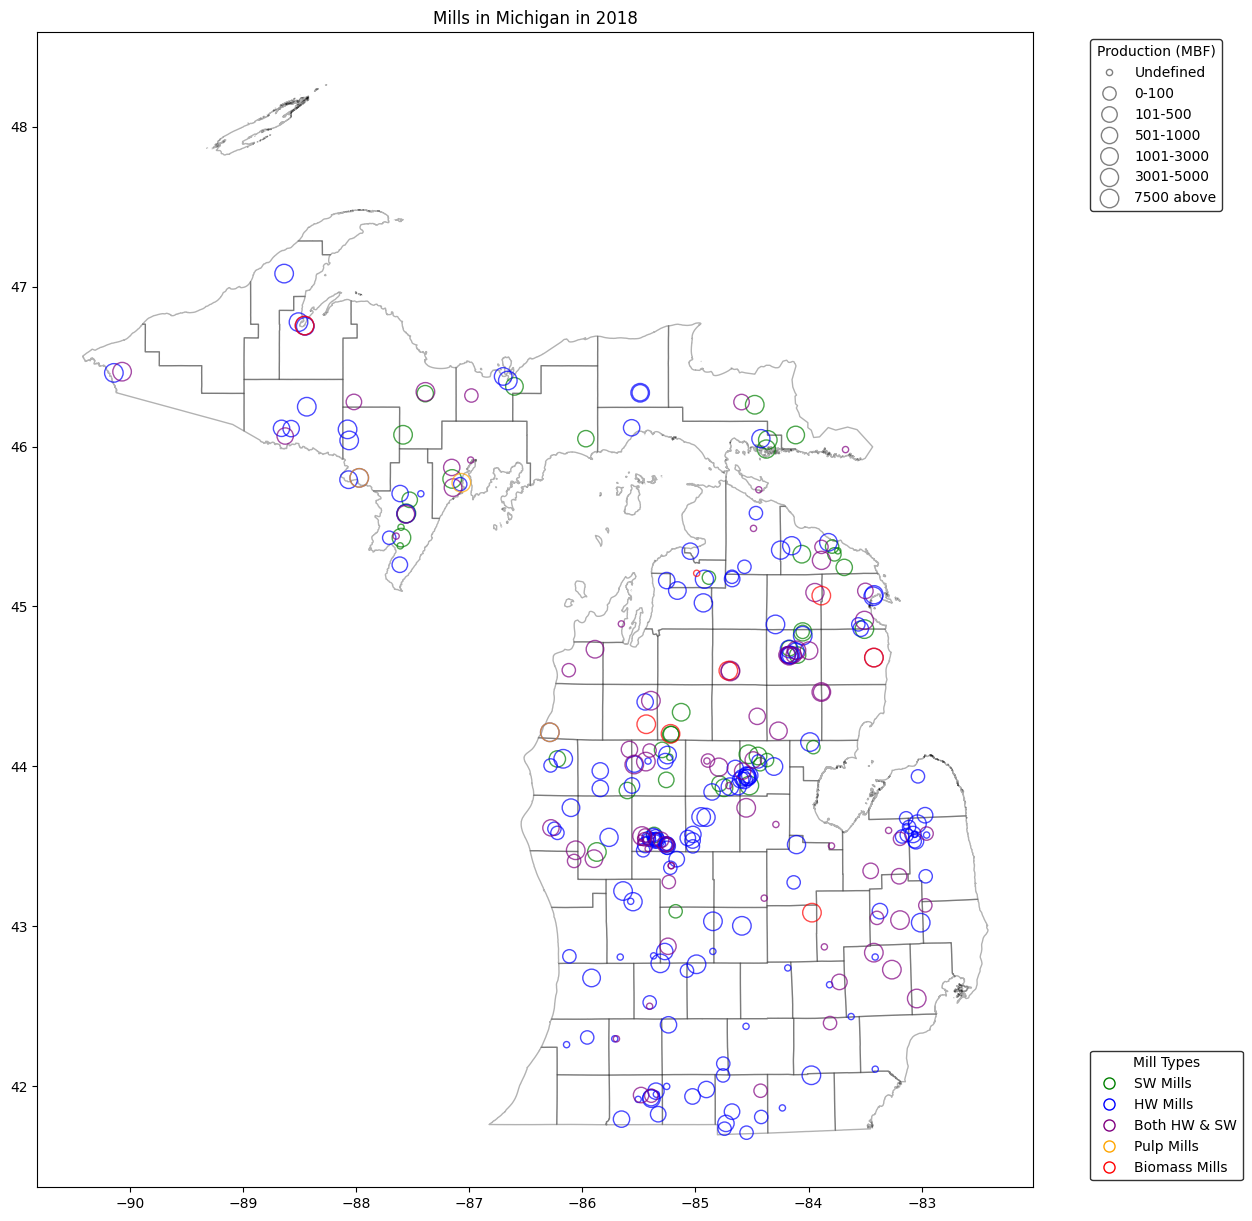

In [15]:


import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Correct base path to match repo structure
base_path = "Khanal_MSc_Thesis_MSU-main/Khanal_MSU_project_Mills_1980-2020s/Data/Final_Mills_MAPS"

# File paths
softwood_shp   = f"{base_path}/Softwood_2018.shp"
hardwood_shp   = f"{base_path}/Hardwood_2018.shp"
both_hwsw_shp  = f"{base_path}/Both_HWSW_2018.shp"
pulp_shp       = f"{base_path}/Pulp_2018.shp"
biomass_shp    = f"{base_path}/Biomass_2018.shp"
michigan_path  = f"{base_path}/Michigan Counties.shp"


# Load shapefiles
softwood_gdf   = gpd.read_file(softwood_shp)
hardwood_gdf   = gpd.read_file(hardwood_shp)
both_hwsw_gdf  = gpd.read_file(both_hwsw_shp)
pulp_gdf       = gpd.read_file(pulp_shp)
biomass_gdf    = gpd.read_file(biomass_shp)
michigan_gdf   = gpd.read_file(michigan_path)

# Convert Production to numeric
for gdf in [softwood_gdf, hardwood_gdf, both_hwsw_gdf, pulp_gdf, biomass_gdf]:
    gdf['Production'] = pd.to_numeric(gdf['Production'], errors='coerce')

# Legend labels
legend_labels = {
    50: "Undefined",
    100: "0-100",
    500: "101-500",
    1000: "501-1000",
    3000: "1001-3000",
    5000: "3001-5000",
    7500: "7500 above",
}

def get_production_category(production):
    if production is None or pd.isna(production):
        return 50
    elif production <= 100:
        return 50
    elif production <= 500:
        return 100
    elif production <= 1000:
        return 500
    elif production <= 3000:
        return 1000
    elif production <= 5000:
        return 3000
    elif production <= 7500:
        return 5000
    else:
        return 7500

def scale_size(category, max_size=200):
    if category <= 50:
        return 20
    else:
        size = np.log(category) * 20
        return min(size, max_size)

def plot_mills(gdf, color, ax, scale_factor=1):
    if 'Production' in gdf.columns:
        gdf['size_category'] = gdf['Production'].apply(get_production_category)
        for _, row in gdf.iterrows():
            ax.scatter(row.geometry.x, row.geometry.y,
                       s=scale_size(row['size_category']) * scale_factor,
                       facecolors='none', edgecolors=color, alpha=0.7)

# Plot base
fig, ax = plt.subplots(figsize=(15, 15), facecolor='white')
michigan_gdf.plot(ax=ax, facecolor='none', edgecolor='black', alpha=0.3)

# Plot mills
plot_mills(softwood_gdf, 'green', ax)
plot_mills(hardwood_gdf, 'blue', ax)
plot_mills(both_hwsw_gdf, 'purple', ax)
plot_mills(pulp_gdf, 'orange', ax)
plot_mills(biomass_gdf, 'red', ax)

# Plot limits
padding = 0.05
x_min, x_max = michigan_gdf.total_bounds[0], michigan_gdf.total_bounds[2]
y_min, y_max = michigan_gdf.total_bounds[1], michigan_gdf.total_bounds[3]
ax.set_xlim(x_min - (x_max - x_min) * padding, x_max + (x_max - x_min) * padding)
ax.set_ylim(y_min - (y_max - y_min) * padding, y_max + (y_max - y_min) * padding)

# Production size legend
capacity_handles = []
for size_category in legend_labels:
    size_in_plot = scale_size(size_category)
    handle = plt.Line2D([0], [0],
                        marker='o',
                        color='grey',
                        markerfacecolor='none',
                        markersize=np.sqrt(size_in_plot),
                        label=legend_labels[size_category],
                        linestyle='None')
    capacity_handles.append(handle)

# Mill type legend
mill_type_colors = {
    'SW Mills': 'green',
    'HW Mills': 'blue',
    'Both HW & SW': 'purple',
    'Pulp Mills': 'orange',
    'Biomass Mills': 'red'
}
mill_handles = [plt.Line2D([0], [0], marker='o', color=color, markerfacecolor='none',
                           markersize=8, label=label, linestyle='None')
                for label, color in mill_type_colors.items()]

# Add legends
capacity_legend = ax.legend(handles=capacity_handles,
                            title='Production (MBF)',
                            loc='upper left',
                            bbox_to_anchor=(1.05, 1),
                            frameon=True,
                            edgecolor='black')
ax.add_artist(capacity_legend)
ax.legend(handles=mill_handles,
          title='Mill Types',
          loc='lower left',
          bbox_to_anchor=(1.05, 0),
          frameon=True,
          edgecolor='black')

plt.title("Mills in Michigan in 2018")

# Save
plt.savefig('mills_in_michigan_2018.png', bbox_inches='tight', pad_inches=0.5, facecolor='white')
plt.show()
